# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

The objective of this project is to determine if machine learning algorithms can help classify individuals in Haiti. Financial Services providers can use the model’s prediction for data-driven decisions on marketing strategies like boosting and promoting  to better target their audience, or developing better financial products for their potentiels clients based on their demographics and socio-economics.


A key goal of the project is to establish whether or not demographic and socio-economic drivers exist that can help us better classify an individual if he has access to formal or non-formal finance services or is he banked or excluded from the financial system ? 

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

Is it possible to use demographic and socio-economic variables to induce a model that can accurately predict the probability that an individual if he has access to formal , non-formal financial services, is he banked or excluded from the financial system  ?

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


I have obtained this data trough Finmark trust database.  [Finmark Trust Data Portal](https://finmark.org.za/data-portal/HTI)


FinMark Trust is an independent non-profit trust with the purpose of ‘Making financial markets work for the poor, by promoting financial inclusion and regional financial integration. We pursue our core objective of making financial markets work for the poor through two principal programmes. The first happens through the creation and analysis of financial services demand side data to provide in-depth insights on both served and unserved consumers across the developing world. The second is through systematic financial sector inclusion and deepening programmes to overcome regulatory, supplier, and other market level barriers hampering the effective provision of services.


FMT's mission of making financial markets work for the poor extends to ensuring economic inclusivity and linking financial inclusion to the real economy. This renewed focus of building inclusive financial sectors for individuals, MSME’s and small-scale farmers is robust and supported within the FMT development framework.



# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

# 1. Exploratory Data Analysis

## Objectives :
- Understand our data as well as possible 
- Develop a first modeling strategy 

## Checklist
#### Shape analysis :
- **Target** : Financial Access Strand
- **Rows and columns** : 4269 , 39
- **Types of variables** : Due the spss file, our dataset columns label are already encoded. 35 float columns
- **Analyis of the Nan values** :
    - 7 columns of our dataset has a Nan percentage over 40% -> Columns about money transactions made with cellphone

#### Analysis :
- **Target Creation** :
 0 :'No Access to financial services at all ' , 
 1 : 'Banked' , 
 2 :'Access to Formal Financial Services', 
 3 : 'Access to informal financial Services' 
 
  
- **Target visualization** :
    - 46% of the people surveyed do not have access to financial services.
    
    
    
- **Meaning of the variables** :
    -  standardized continuous variables, distribution non-normal, skewed, Age . we will discretized it
    - variable qualitative : binaire (0, 1),  gouvernement ID, transactions made,communication devices used , financial services used



- **Relationship Variables / Target** :
    - target / departement : Is there a difference between the people surveyed depending on where they live amd their access to financial services ? -> hypothesis to be tested
    - target/age : Access to financial services depend on the Age ?  -> 
    - Target / Income : Does the level of income have an impact on the target ?
    - Target and access to government Id
    - Target/ Communication Device

    
    
## More in-depth Analysis

- **Relation Variables / Variables** :
    - Relationship betwwen ID card and departememt
    - level of education / access to communication devices

    






    

## Importing the libraries

In [241]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from scipy.stats import chi2_contingency
from sklearn import preprocessing,  metrics, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,train_test_split 
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_val_predict
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix,DiscriminationThreshold
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

## Loading the dataset

In [242]:
df1, meta = pyreadstat.read_sav('FinScope Haiti 2018 - 7 Feb 2020.sav',usecols=['departement','q09','npers','a11','a12','a13','a14aa','a14ba','a16__1',	'a16__2','a16__3'	,'a16__4'	,'a16__5','c9','e2__1',	'e2__2','e2__5','e3__1',	'e3__2',	'e3__3','e6__1','e6__3'	,'e6__5',	'e6__99','f1','f8','f9a','j2a','j5a__13','j5a__6','j5a__12','j5a__2','l1__1',	'l1__2','l2a__1','l2a__2','i2i_Source_of_income','Mobile_Money','Those_saving','Those_borrowing','Those_insured','FAS'],user_missing=True)

In [243]:
df1.dtypes.value_counts()

float64    42
dtype: int64

### Renaming the columns of the dataset

In [244]:
df1

,departement,q09,npers,a11,a12,a13,a14aa,a14ba,a16__1,a16__2,...,l1__1,l1__2,l2a__1,l2a__2,Mobile_Money,FAS,Those_saving,Those_borrowing,Those_insured,i2i_Source_of_income
0,9.0,1.0,5.0,1.0,43.0,5.0,1.0,2.0,1.0,0.0,...,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,NaN,9.0
1,9.0,1.0,7.0,2.0,28.0,3.0,7.0,2.0,1.0,1.0,...,1.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,NaN,9.0
2,9.0,1.0,3.0,2.0,16.0,1.0,4.0,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,NaN,6.0
3,9.0,1.0,5.0,1.0,27.0,1.0,6.0,2.0,1.0,1.0,...,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,NaN,6.0
4,1.0,1.0,2.0,2.0,26.0,1.0,5.0,1.0,1.0,0.0,...,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,11.0,2.0,6.0,2.0,34.0,2.0,4.0,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,NaN,5.0
4265,11.0,2.0,7.0,1.0,22.0,1.0,4.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0
4266,11.0,2.0,3.0,1.0,20.0,1.0,5.0,2.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,2.0,NaN,1.0,NaN,6.0
4267,11.0,2.0,1.0,1.0,19.0,1.0,4.0,2.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,2.0,NaN,NaN,NaN,1.0


In [245]:
my_dict = {}
for col in df1.columns:
    my_dict[col] = meta.column_names_to_labels[col]


In [246]:
df1.rename(columns = my_dict, inplace= True)

## Retrieving informations about the dataset

In [247]:
df1 = df1[df1.columns[(df1.isna().sum()/df1.shape[0] < 0.9)]]

In [248]:
print('------------------------------ Dataset Shape ------------------------------')
print('The dataset has',df1.shape[0], 'Rows and', df1.shape[1],'columns')

print('------------------------------ Dataframe Columns ------------------------------')
display(df1.columns)

print('------------------------------ Data types ------------------------------')
display(df1.dtypes.value_counts())

------------------------------ Dataset Shape ------------------------------
The dataset has 4269 Rows and 41 columns
------------------------------ Dataframe Columns ------------------------------


Index(['DEPARTMENT', 'Residence stratum', 'Number of people in household',
       'A1.1. Enumerator: Register sex; ask only of you are uncertain',
       'A1.2. How old are you?', 'A.1.3. What is your current marital status?',
       'A.1.4aa What  is the highest level of education achieved?',
       'A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a',
       'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate',
       'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport',
       'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3.  National identity card/Voter Card',
       'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:4. Driving Licence',
       'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:5. Matricule fiscale  (NIF)',
       'C9. What is your TOTAL PERSONAL MONTHLY INCOME',

------------------------------ Data types ------------------------------


float64    41
dtype: int64

## Defining functions to perform transformation on the data 

In [249]:
def relabel1(data  = None,columns = None) :
    '''
    This function defined here is to relabel the variable in the columns where No == 2
    '''
    for col in columns :
        data[col] = data[col].apply(lambda x : 0 if x == 2 else x)


In [250]:
def plot_bar(data  = None , columns = None, title = None ,hue = None , labels = None ) : 
    
    
    ax = sns.countplot(data = data, x = columns ,hue =hue, order = data[columns].value_counts().index)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.legend(title= title, loc='upper right', labels = labels)
    ax.set_xticklabels(['No Access to financial services at all ' , 'Access to Informal financial services',  'Access to formal Financial Services (Non-Bank) ','Bancarised'  ])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(p.get_height()/len(data)*100)
        x = p.get_x() + p.get_width()/2  -0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), clip_on=True, weight='bold', color='white', fontsize=14)

In [251]:
def bar1( num = None, title  = None ) : 
    p2 = df1[df1['Financial Access Strand'] == num]['DEPARTMENT' ].value_counts().to_frame()
    department_count = pd.merge(depart,p2, how = 'right', left_on  = depart.index,right_on  = p2.index).sort_values(by='DEPARTMENT',ascending =False)[[0,'DEPARTMENT']]
    department_count
    sns.barplot( x = 'DEPARTMENT' , y = 0 ,  data = department_count ,  palette="Blues_d")
    plt.title(title)

## Transforming the data 

In [252]:
df1['C9. What is your TOTAL PERSONAL MONTHLY INCOME'] =  df1['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].apply(lambda x : 0 if (x == 98) | (x == 99)  else x)

Creating Our Target Variable 

In [253]:
df1

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,...,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash,Mobile Money,Financial Access Strand,Saving,Borrowing,i2i_Source_of_income
0,9.0,1.0,5.0,1.0,43.0,5.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,9.0
1,9.0,1.0,7.0,2.0,28.0,3.0,7.0,2.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,9.0
2,9.0,1.0,3.0,2.0,16.0,1.0,4.0,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,6.0
3,9.0,1.0,5.0,1.0,27.0,1.0,6.0,2.0,1.0,1.0,...,0.0,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,6.0
4,1.0,1.0,2.0,2.0,26.0,1.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,NaN,NaN,99.0,99.0,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,11.0,2.0,6.0,2.0,34.0,2.0,4.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,99.0,99.0,NaN,NaN,5.0
4265,11.0,2.0,7.0,1.0,22.0,1.0,4.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,2.0,2.0,NaN,NaN,2.0
4266,11.0,2.0,3.0,1.0,20.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,2.0,NaN,1.0,6.0
4267,11.0,2.0,1.0,1.0,19.0,1.0,4.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,2.0,NaN,NaN,1.0


In [254]:
df1['Borrowing'].value_counts()

1.0    576
Name: Borrowing, dtype: int64

In [255]:
df1['Mobile Money'] = df1['Mobile Money'].apply(lambda x : 0 if x == 99  else 1)

In [256]:
df1['Mobile Money'] = df1['Mobile Money'].apply(lambda x : x if x == 0  else 1)

In [257]:
df1['Financial Access Strand'] = df1['Financial Access Strand'].apply(lambda x : 0 if x == 99  else x)

In [258]:
ano = {0 :'No Access to financial services at all ' , 
 1 : 'Bancarised' , 
 2 :'Access to formal Financial Services (Non-Bank) ', 
 3 : 'Access to Informal financial services'}

In [259]:
relabel1(df1 , columns= ['Residence stratum','A1.1. Enumerator: Register sex; ask only of you are uncertain','F9a During the last 12 months, have you received money from a person living abroad?',' In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?','People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?','A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a','A1.1. Enumerator: Register sex; ask only of you are uncertain','F9a During the last 12 months, have you received money from a person living abroad?',' In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?','People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?','J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?'])

In [260]:
df1['E6. For which of the following activities do you use your mobile phone?: None (single mention only)']=df1['E6. For which of the following activities do you use your mobile phone?: None (single mention only)'].fillna(1)

In [261]:
df1.isna().sum()

DEPARTMENT                                                                                                                                                                                                                       0
Residence stratum                                                                                                                                                                                                                0
Number of people in household                                                                                                                                                                                                    0
A1.1. Enumerator: Register sex; ask only of you are uncertain                                                                                                                                                                    0
A1.2. How old are you?                                                                      

In [262]:
df1 = df1.fillna(0)

In [263]:
df1['age_bins'], bins_dist = pd.qcut(df1['A1.2. How old are you?'],14,labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13], retbins= True)

In [264]:
def colhisplot(data=None, columns=None,  x=None) :
  return sns.histplot(data=data, x=columns, hue=x, multiple="stack")
  sns.set_theme()

In [265]:
m

NameError: name 'm' is not defined

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Repartittion of target')

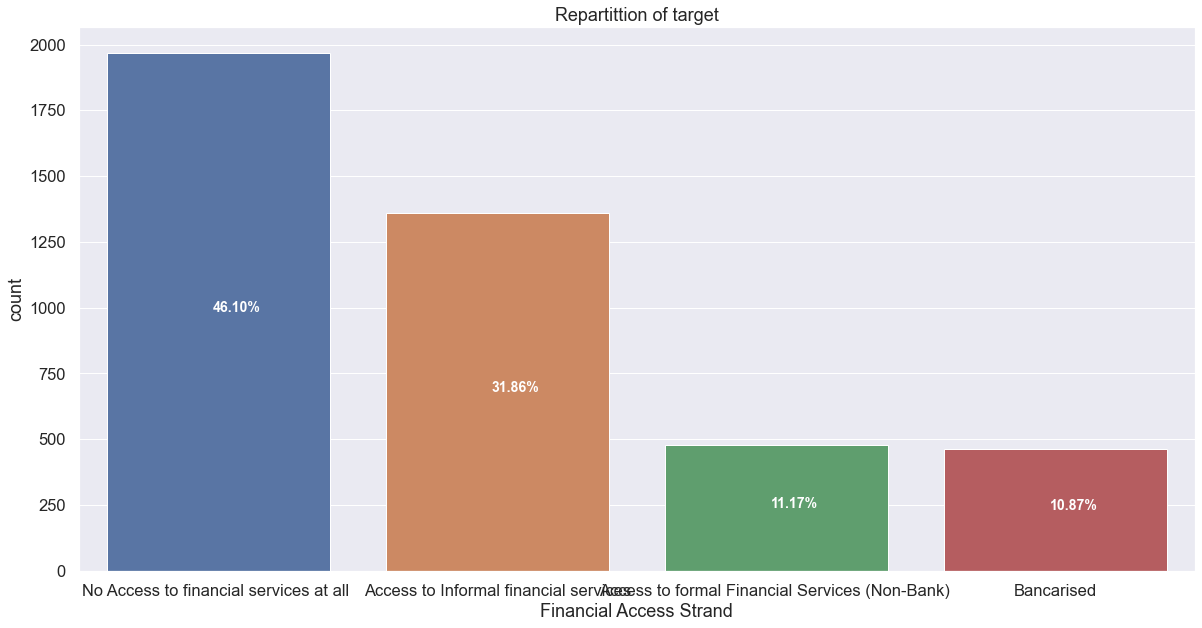

In [ ]:
plot_bar(data = df1 , columns=  'Financial Access Strand')
plt.title('Repartittion of target')


In the graph above ,  we can see how our target variable is distributed. 31.86

* Location of the people surveyed

In [ ]:
p ={ 1: 'Ouest',2.0: 'Artibonite', 3.0: 'Centre', 4.0: 'GrandAnse', 5.0: 'Nippes', 6.0: 'Nord', 7.0: 'Nord-Est', 8.0: 'Nord-Ouest', 9.0: 'Reste-Ouest', 10.0: 'Sud', 11.0: 'Sud-Est'}

In [ ]:
depart = pd.DataFrame.from_dict(p,orient='index')

In [ ]:
from scipy.stats import shapiro
statistic,pvalue=shapiro(df1['A1.2. How old are you?'])
alpha = 0.05
print('The Shapiro Wilk Test for the whole dataset')
print(pvalue)
if pvalue > alpha:
	print('ho Distribution follows a gaussian distribution (fail to reject H0)')
else:
	print('h1 Distribution doesnt follows a gaussian distribution  (reject H0)')


The Shapiro Wilk Test for the whole dataset
8.63007544755414e-34
h1 Distribution doesnt follows a gaussian distribution  (reject H0)


* Descriptive Analysis 

Age Distribution

<AxesSubplot:xlabel='A1.2. How old are you?', ylabel='Count'>

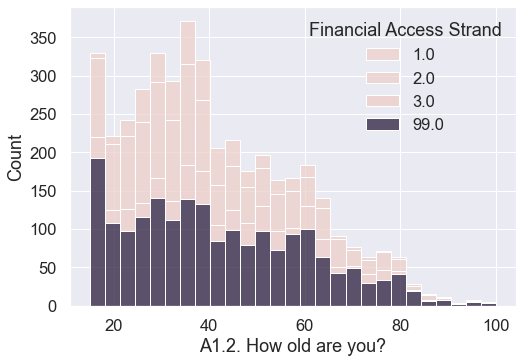

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("tab10")
colhisplot(data = df1, columns  ='A1.2. How old are you?', x = 'Financial Access Strand' )

In [ ]:
dp_table = pd.crosstab(df1['age_bins'],df1['Financial Access Strand'])
print('Ho  : Access to financial services independant of the Age')
display(dp_table.rename(index ={ 0: '15-19',1: '20-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 11 : '70-74',12:'75-79', 13 : '80+'}))
stat, pvalue, dof, expected = chi2_contingency(dp_table)
alpha = 0.05
print("pvalue is " + str(pvalue))
if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Ho  : Access to financial services independant of the Age


Financial Access Strand,1.0,2.0,3.0,99.0
age_bins,,,,
15-19,6,103,27,193
20-24,17,121,29,146
25-29,46,135,31,143
30-34,33,108,20,117
35-39,50,129,25,128
40-44,41,101,36,116
45-49,50,89,34,116
50-54,49,73,36,98
55-59,59,86,35,138


pvalue is 1.0991246983931178e-23
Dependent (reject H0)


In [ ]:
df1[df1['Financial Access Strand'] == 0][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,1968.000000,1968.000000
mean,3.603150,42.025915
std,1.927388,18.548493
min,1.000000,15.000000
25%,2.000000,27.000000
50%,3.000000,40.000000
75%,5.000000,56.000000
max,15.000000,100.000000


* People who have no access to financial services

<AxesSubplot:xlabel='A1.2. How old are you?'>

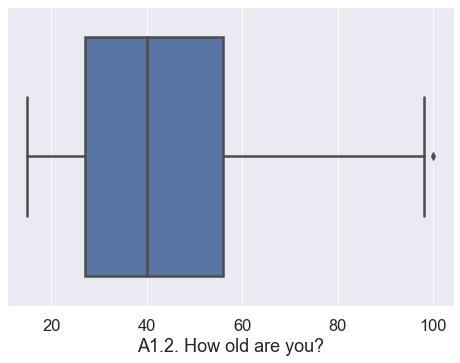

In [ ]:
sns.boxplot(df1[df1['Financial Access Strand'] == 0]['A1.2. How old are you?'])#,bins = bins,kde = True)

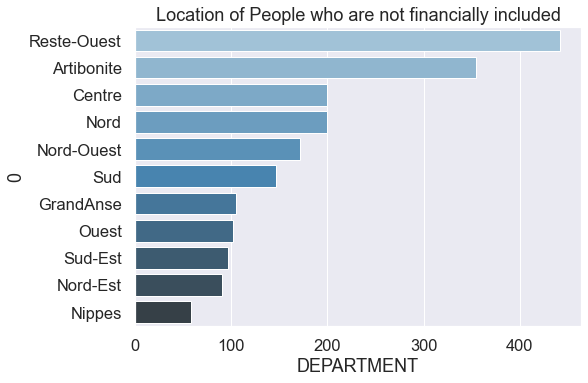

In [ ]:
bar1(num = 0, title = 'Location of People who are not financially included')

* People who have access to mobile money but not financial services

In [ ]:
df1[df1['Financial Access Strand'] == 1][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,477.000000,477.00000
mean,3.654088,40.06499
std,2.004158,13.22407
min,1.000000,15.00000
25%,2.000000,31.00000
50%,3.000000,38.00000
75%,5.000000,46.00000
max,14.000000,95.00000


<AxesSubplot:xlabel='A1.2. How old are you?'>

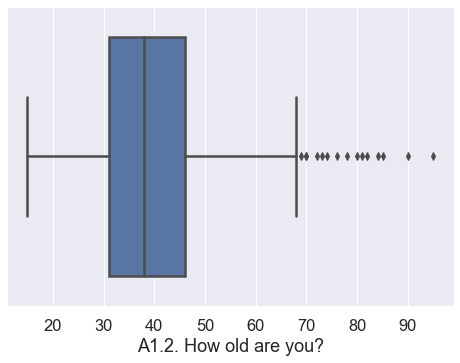

In [ ]:
sns.boxplot(df1[df1['Financial Access Strand'] == 1]['A1.2. How old are you?'])#,bins = bins,kde = True)

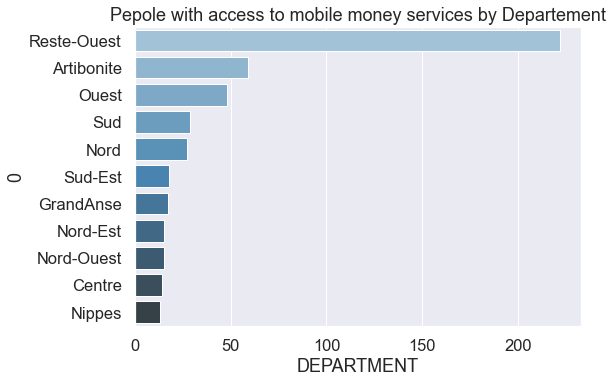

In [ ]:
bar1(1, title = 'People with access to mobile money services by Departement')

* People who have access to other financial services but not mobile money.

In [ ]:
df1[df1['Financial Access Strand'] == 2][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,1360.000000,1360.000000
mean,3.849265,39.281618
std,1.992277,17.160566
min,1.000000,15.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,50.000000
max,18.000000,100.000000


<AxesSubplot:xlabel='A1.2. How old are you?'>

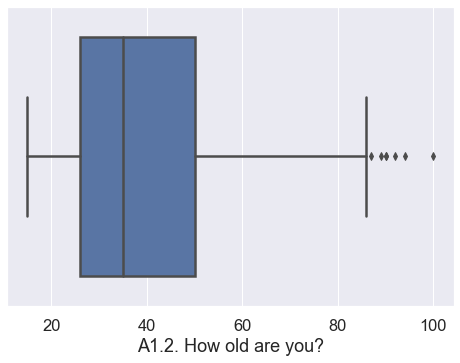

In [ ]:
sns.boxplot(df1[df1['Financial Access Strand'] == 2]['A1.2. How old are you?'])#,bins = bins,kde = True)

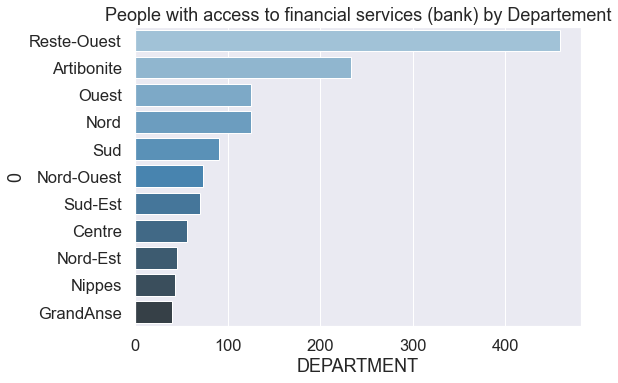

In [ ]:
bar1(2, title = 'People with access to financial services (bank) by Departement')

* People who have access to financial services and mobile money at the same time . 

In [ ]:
df1[df1['Financial Access Strand'] == 3][['Number of people in household','A1.2. How old are you?']].describe()

,Number of people in household,A1.2. How old are you?
count,464.000000,464.000000
mean,3.952586,42.816810
std,1.999437,16.294895
min,1.000000,15.000000
25%,2.000000,30.000000
50%,4.000000,41.000000
75%,5.000000,54.000000
max,13.000000,87.000000


<AxesSubplot:xlabel='A1.2. How old are you?'>

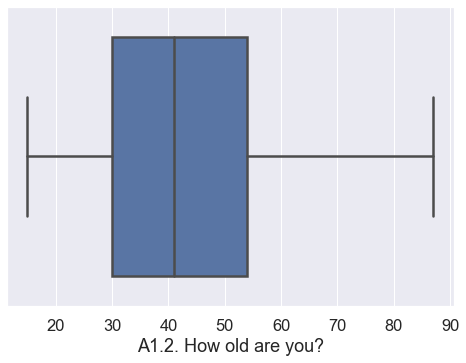

In [ ]:
sns.boxplot(df1[df1['Financial Access Strand'] == 3]['A1.2. How old are you?'])#,bins = bins,kde = True)

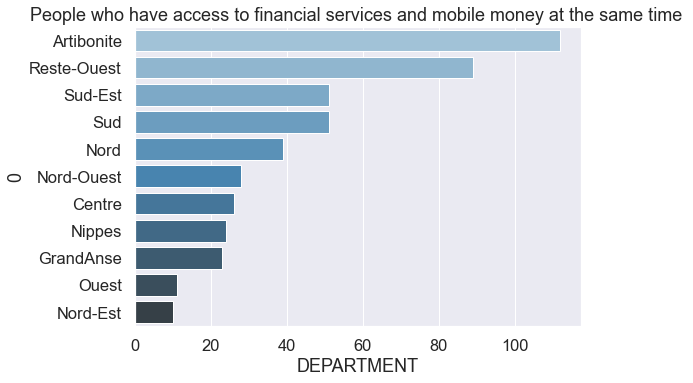

In [ ]:
bar1(3, title = 'People who have access to financial services and mobile money at the same time ')

## Target / Bank Account

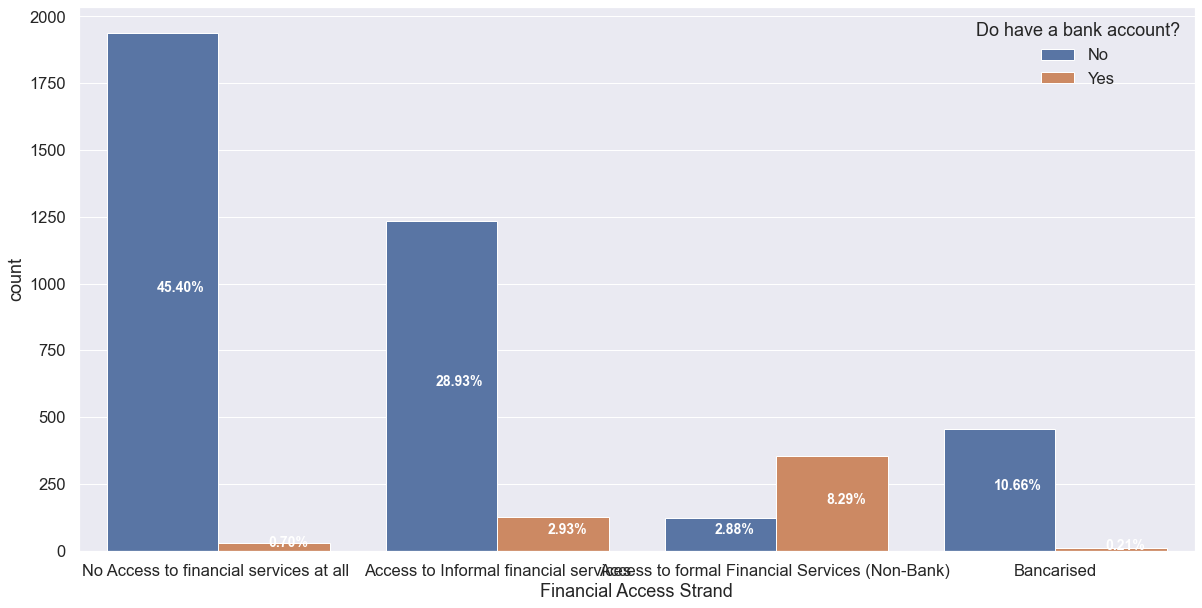

In [ ]:
plot_bar(df1, columns = 'Financial Access Strand',  title='Do have a bank account?',hue  ='J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?',labels = ['No','Yes'] )

## Target / Level of Education

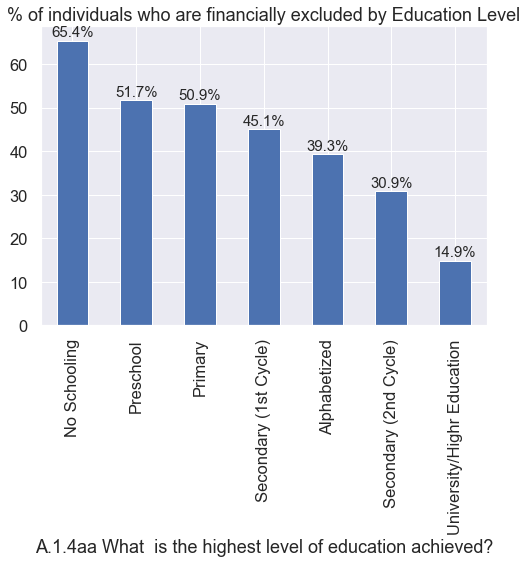

In [ ]:
ax = ((df1[df1['Financial Access Strand']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
plt.title("% of individuals who are financially excluded by Education Level") 
 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

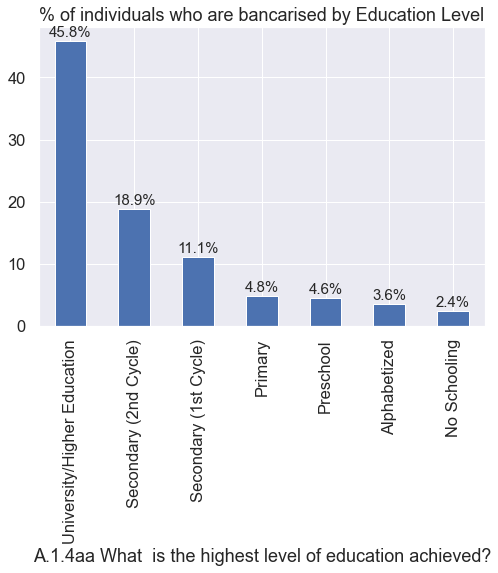

In [ ]:
ax = ((df1[df1['Financial Access Strand']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
fig.set_size_inches(15, 10) 
plt.title("% of individuals who are bancarised by Education Level") 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

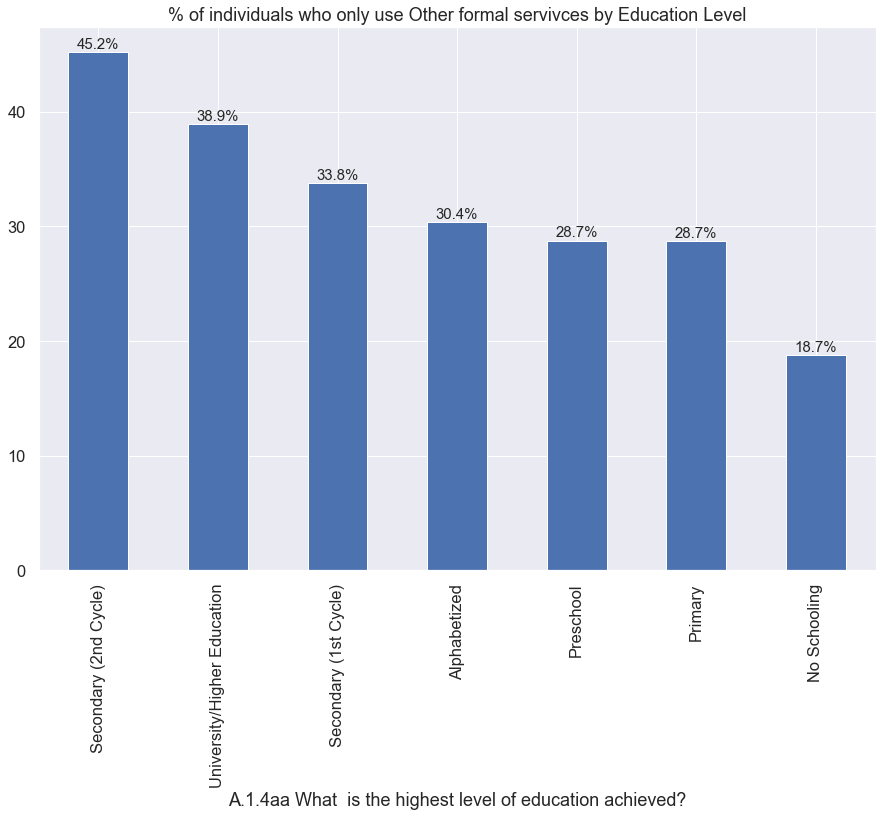

In [ ]:
ax = ((df1[df1['Financial Access Strand']==2].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("% of individuals who only use Other formal services by Education Level") 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

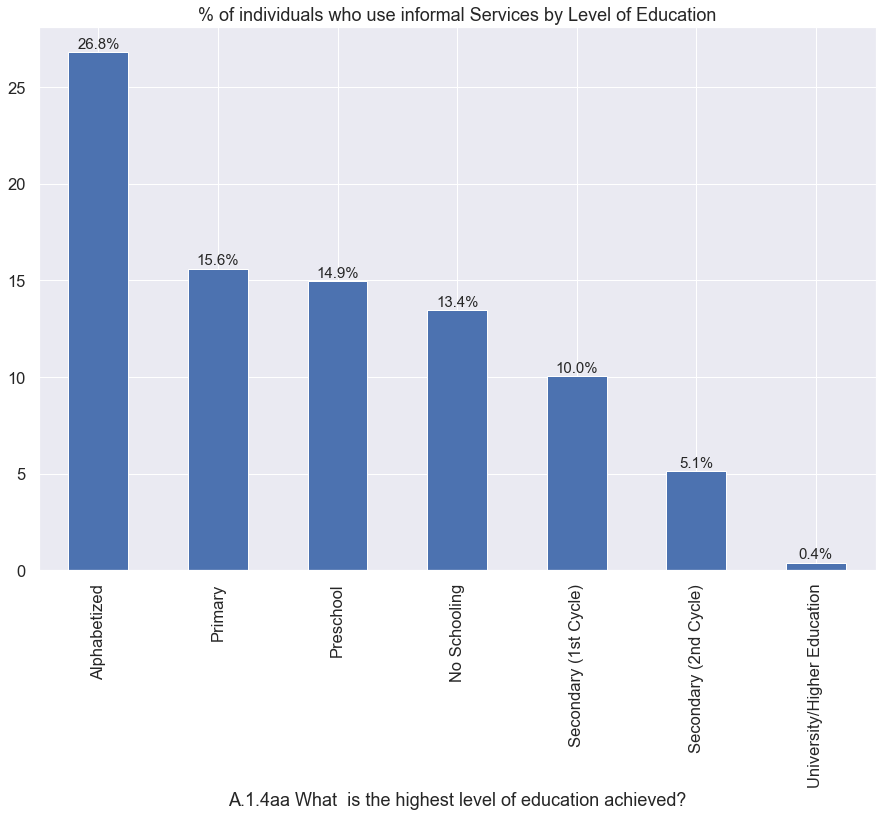

In [ ]:
ax  = ((df1[df1['Financial Access Strand']==3].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()

fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("% of individuals who use informal Services by Level of Education") 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

## Target / Departement

In [ ]:
(df1.groupby(['DEPARTMENT', 'Financial Access Strand'])['Financial Access Strand'].count()/df1.groupby(['DEPARTMENT'])['Financial Access Strand'].count()).to_frame()

,,Financial Access Strand
DEPARTMENT,Financial Access Strand,
3.0,0.0,0.675676
8.0,0.0,0.597222
4.0,0.0,0.567568
7.0,0.0,0.562500
6.0,0.0,0.511509
2.0,0.0,0.467721
10.0,0.0,0.462264
1.0,2.0,0.437063
5.0,0.0,0.420290


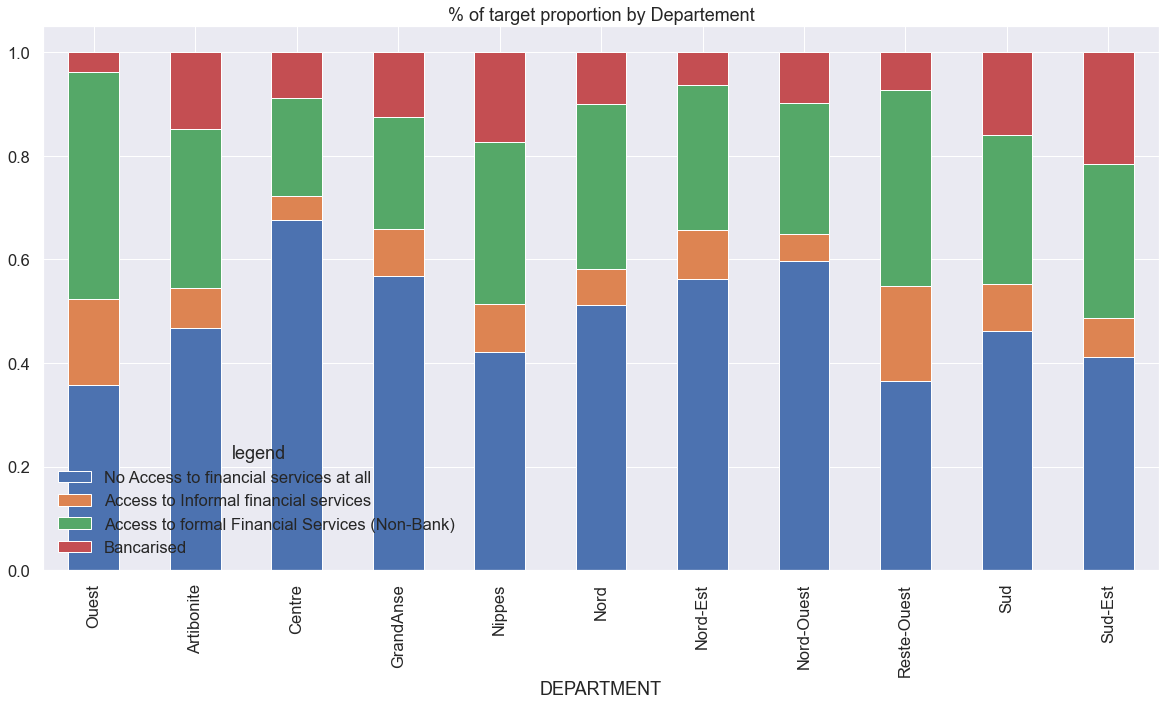

In [ ]:

(df1.groupby(['DEPARTMENT', 'Financial Access Strand'])['Financial Access Strand'].count()/df1.groupby(['DEPARTMENT'])['Financial Access Strand'].count()).unstack().plot.bar(stacked=True).set_xticklabels(p.values())
plt.legend(title= 'legend', loc='best', labels =['No Access to financial services at all ' , 'Access to Informal financial services',  'Access to formal Financial Services (Non-Bank) ','Bancarised'  ] )
plt.title('% of target proportion by Departement') 
fig = plt.gcf()
fig.set_size_inches(20, 10)



  

In [ ]:
dp_table = pd.crosstab(df1['Financial Access Strand'],df1['DEPARTMENT'],margins = False)
print('Ho  :There is no difference between the people surveyed depending on where they live amd their access to financial services')
display(dp_table.rename( index = ano,columns=p))
stat, pvalue, dof, expected = chi2_contingency(dp_table)
alpha = 0.05
print("pvalue is " + str(pvalue))
if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Ho  :There is no difference between the people surveyed depending on where they live amd their access to financial services


DEPARTMENT,Ouest,Artibonite,Centre,GrandAnse,Nippes,Nord,Nord-Est,Nord-Ouest,Reste-Ouest,Sud,Sud-Est
Financial Access Strand,,,,,,,,,,,
No Access to financial services at all,102,355,200,105,58,200,90,172,442,147,97
Bancarised,48,59,14,17,13,27,15,15,222,29,18
Access to formal Financial Services (Non-Bank),125,233,56,40,43,125,45,73,459,91,70
Access to Informal financial services,11,112,26,23,24,39,10,28,89,51,51


pvalue is 7.667140887747041e-51
Dependent (reject H0)


## Target / Mobile Phone Access

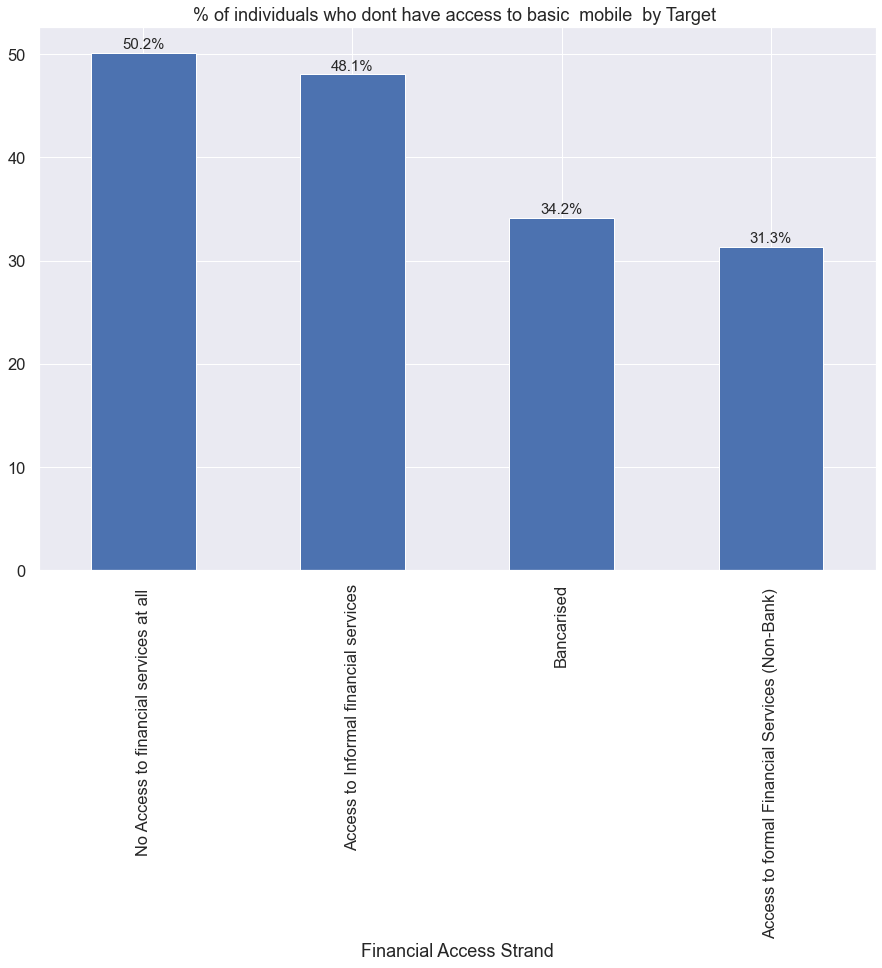

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone'] == 0].groupby(['Financial Access Strand'])['Financial Access Strand'].count()/df1.groupby(['Financial Access Strand'])['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].count())*100).sort_values(ascending = False).rename(index = ano).plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 10) 
ax.set_xticklabels(['No Access to financial services at all ' ,'Access to Informal financial services'  ,'Bancarised', 'Access to formal Financial Services (Non-Bank) '])
plt.title("% of individuals who dont have access to basic  mobile  by Target ")
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')  

In [ ]:
def plotn(columns = None, numb = None, target = None, title  = None ,  label = None) :
    ax = ((df1[df1[columns] == numb].groupby([target])[target].count()/df1.groupby([target])['C9. What is your TOTAL PERSONAL MONTHLY INCOME'].count())*100).sort_values(ascending = False).rename(index = label).plot.bar()
    fig = plt.gcf()
    fig.set_size_inches(15, 10) 

    plt.title(title)
    for bar in ax.patches:
        ax.annotate('{:.1f}%'.format(bar.get_height()),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')  

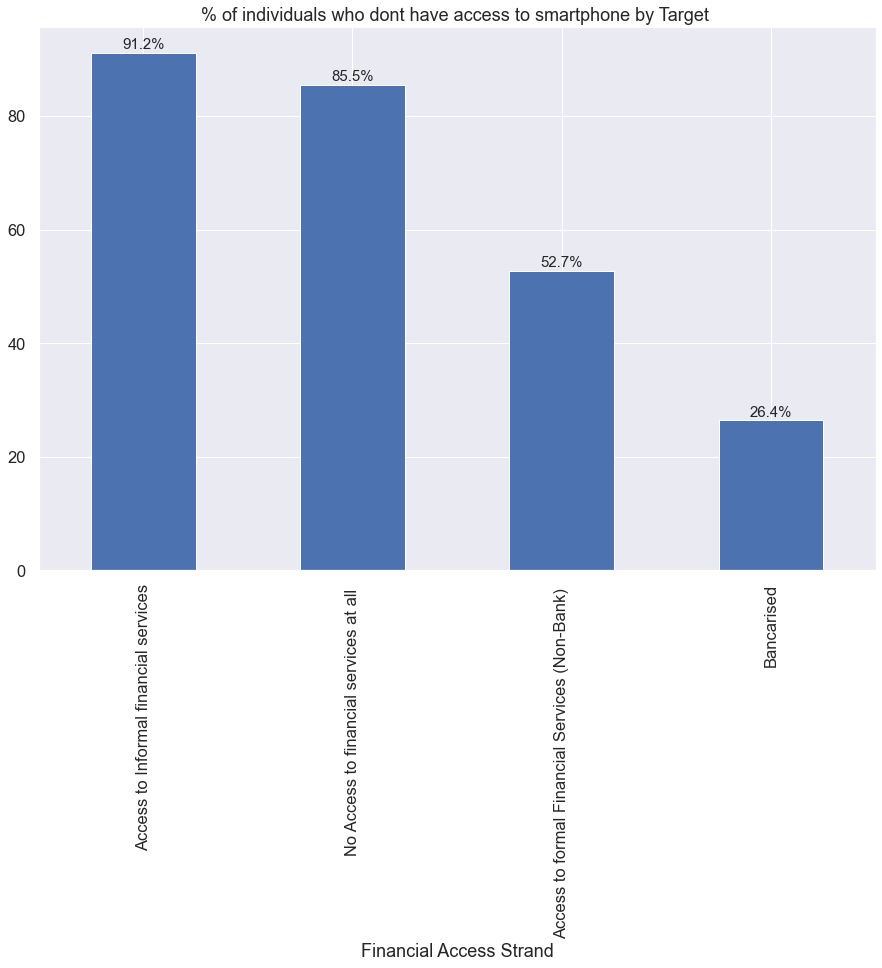

In [ ]:
plotn(columns = 'E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)' , numb= 0 , target = 'Financial Access Strand',title = '% of individuals who dont have access to smartphone by Target ', label = ano)

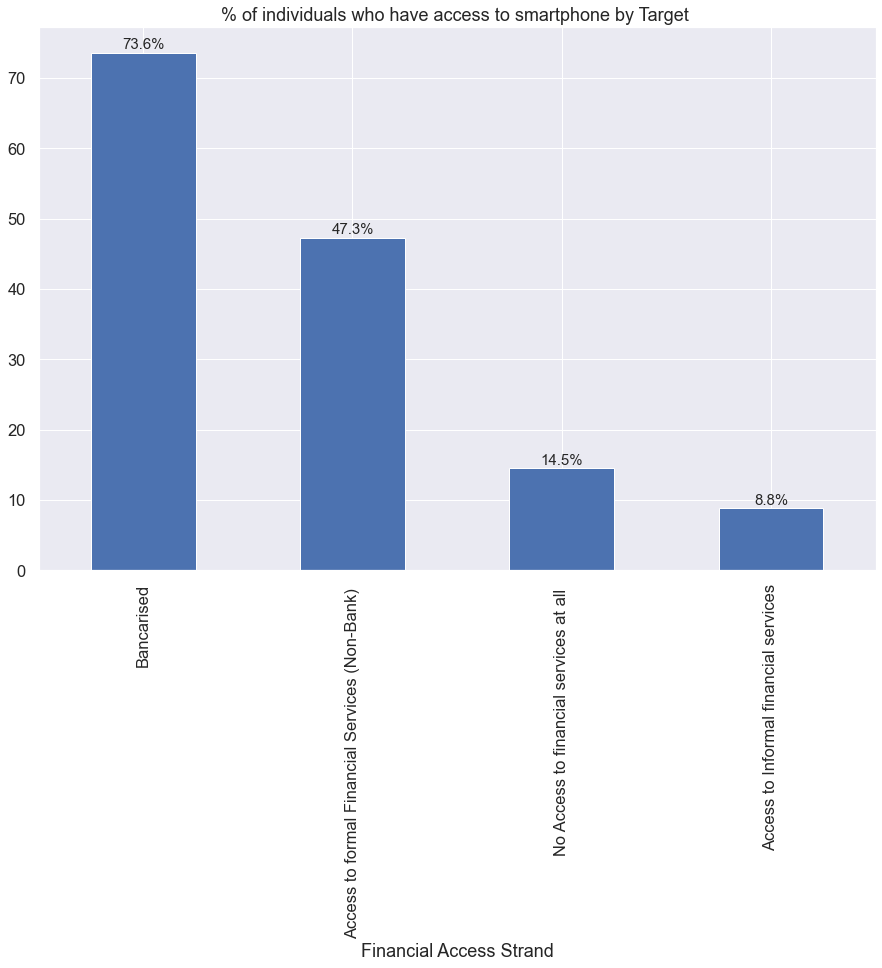

In [ ]:
plotn(columns = 'E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)' , numb= 1 , target = 'Financial Access Strand',title = '% of individuals who have access to smartphone by Target ', label = ano)

## Gouvernement ID / Department

* Here,we want to see if the access to identification by departement follow the same as the target by departement.
    - National identity card/Voter Card

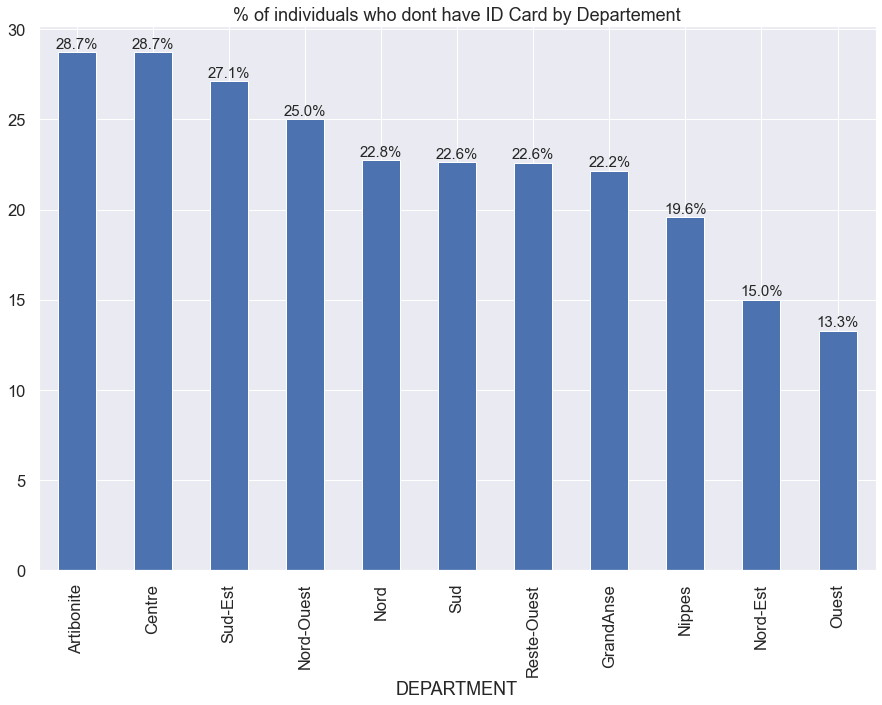

In [ ]:
plotn(columns = 'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3.  National identity card/Voter Card' , numb= 0 , target = 'DEPARTMENT',title = '% of individuals who dont have ID Card by Departement', label = p)
 

This graph show that Centre,Artibonite,Nord-ouest are in the top 4 of department with more the 25% of the people dont have Gouvernement ID. Non-Acces to identification could be a barrier for individual who wants to use financial services. 

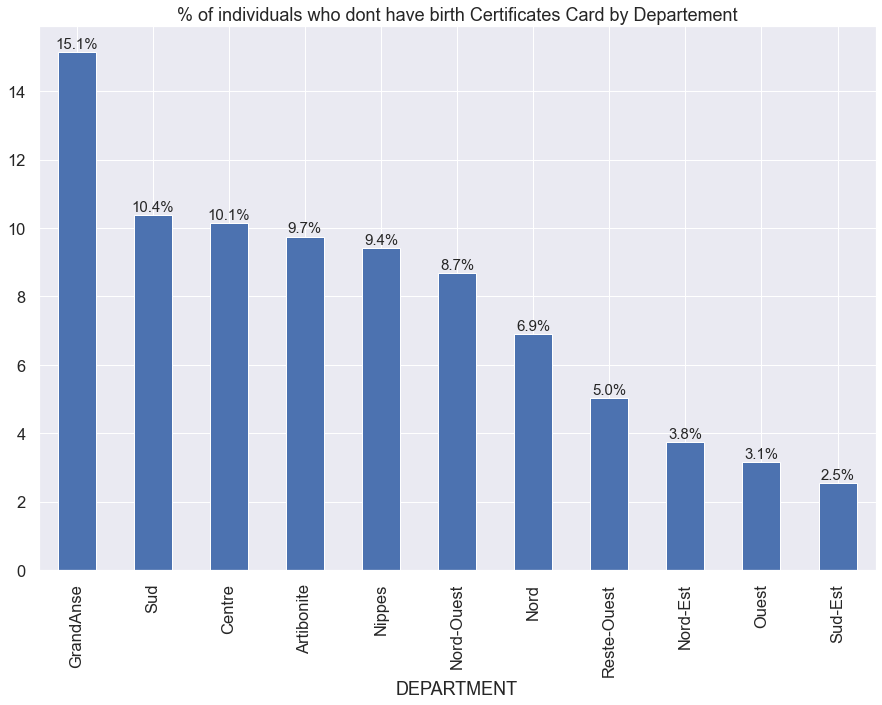

In [ ]:
plotn(columns = 'A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate' , numb= 0 , target = 'DEPARTMENT',title = '% of individuals who dont have birth Certificates Card by Departement', label = p)


This graph show that GrandAnse, Sud, Centre and Artibonite are in the top 4 of department with more the 9% of the people don't have access to Birth certificate.  

## Level of education / Access to Communication Devices

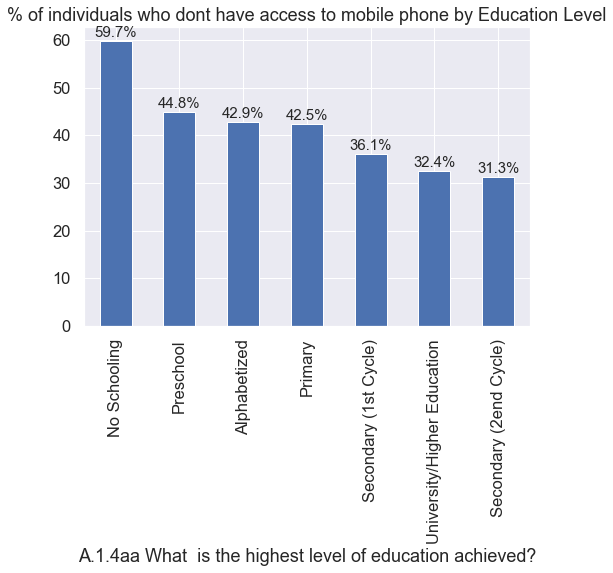

In [ ]:

ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2end Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
plt.title('% of individuals who dont have access to mobile phone by Education Level')  
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

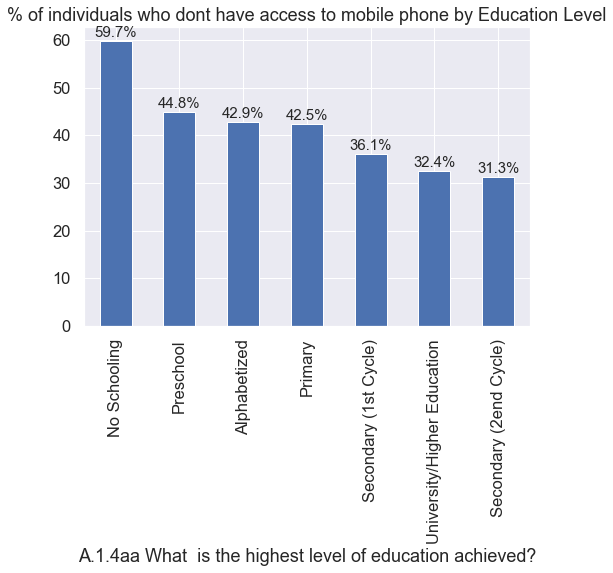

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2end Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
plt.title('% of individuals who dont have access to mobile phone by Education Level')  
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

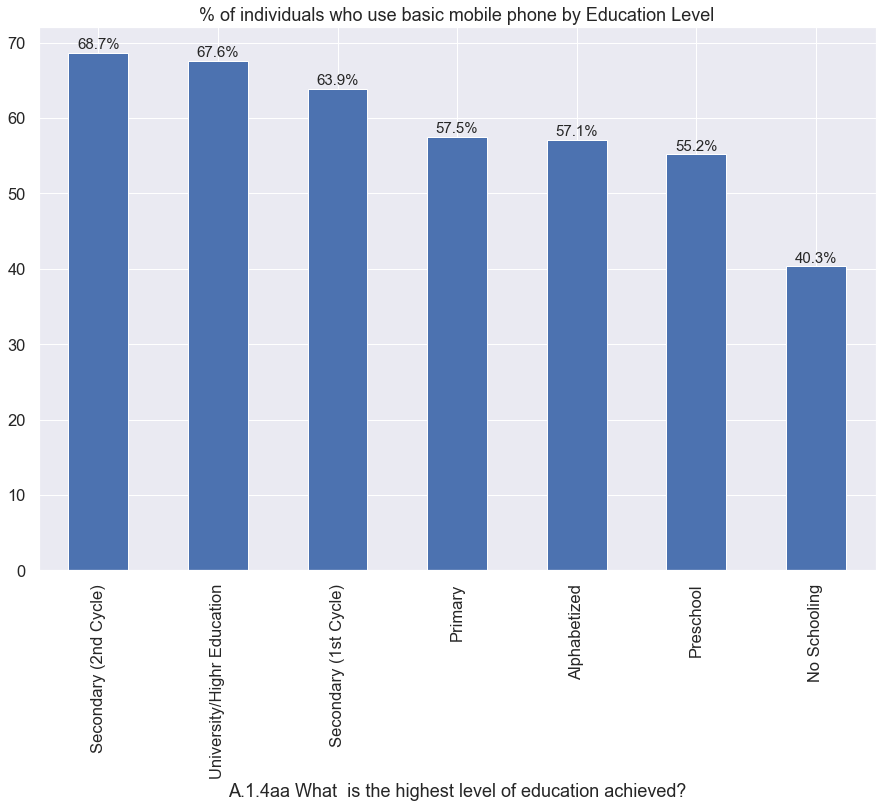

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Basic mobile phone']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
plt.title('% of individuals who use basic mobile phone by Education Level') 
fig = plt.gcf()
fig.set_size_inches(15, 10)  
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

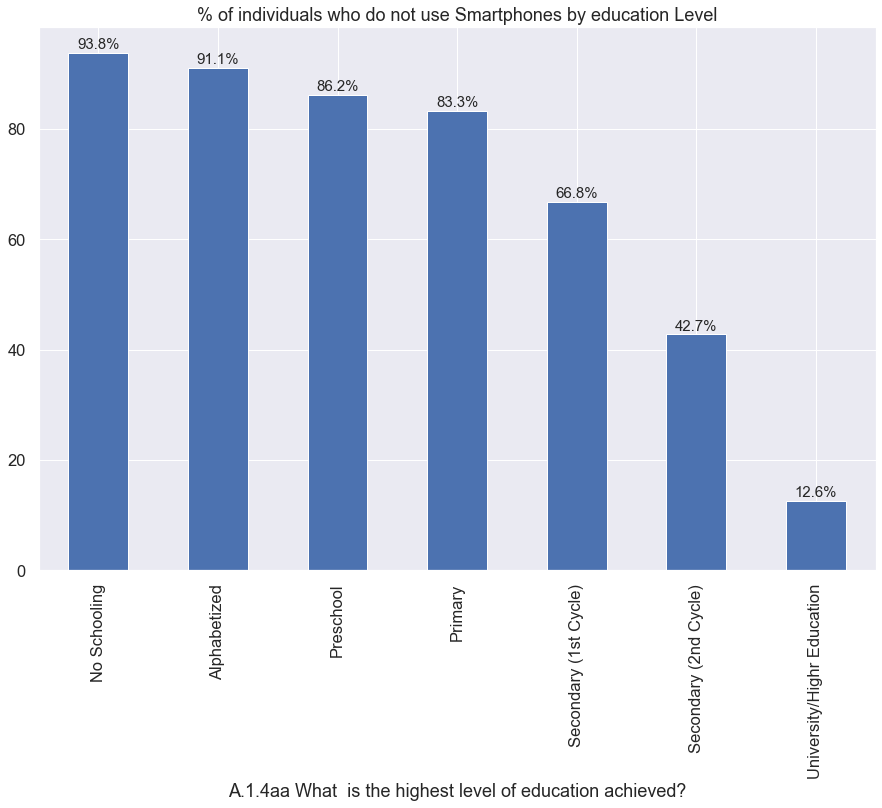

In [ ]:
plots = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Highr Education'}).plot.bar()
fig = plt.gcf()
fig.set_size_inches(15, 10) 
plt.title('% of individuals who do not use Smartphones by education Level')
for bar in plots.patches:
    plots.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

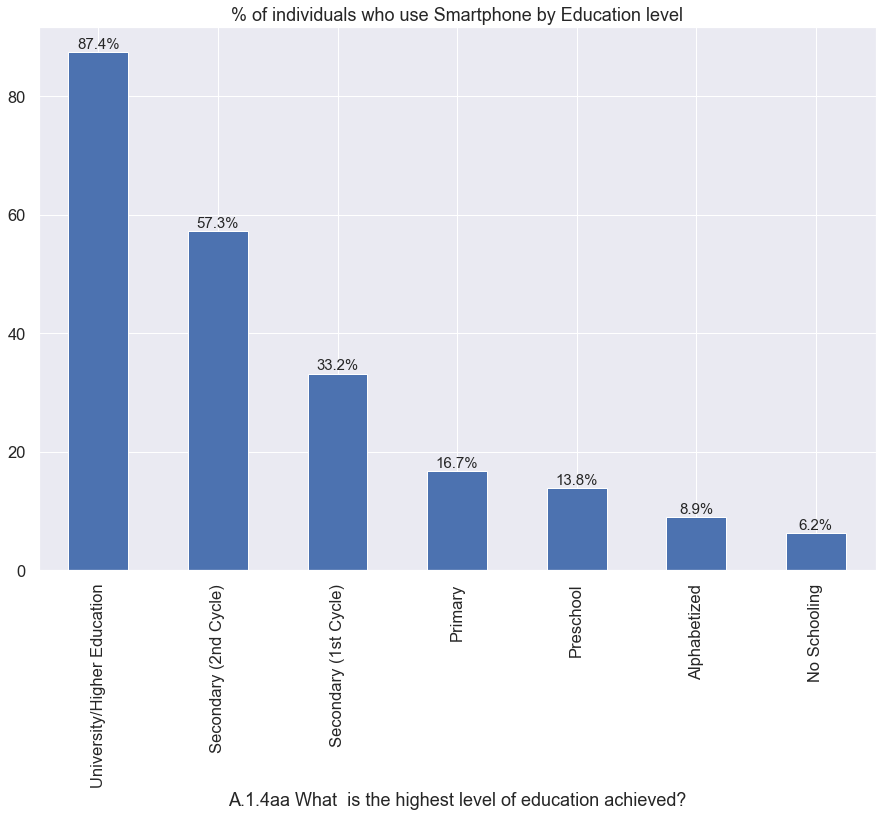

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Smartphone (mobile)']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
plt.title("% of individuals who use Smartphone by Education level")
fig = plt.gcf()
fig.set_size_inches(15, 10) 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

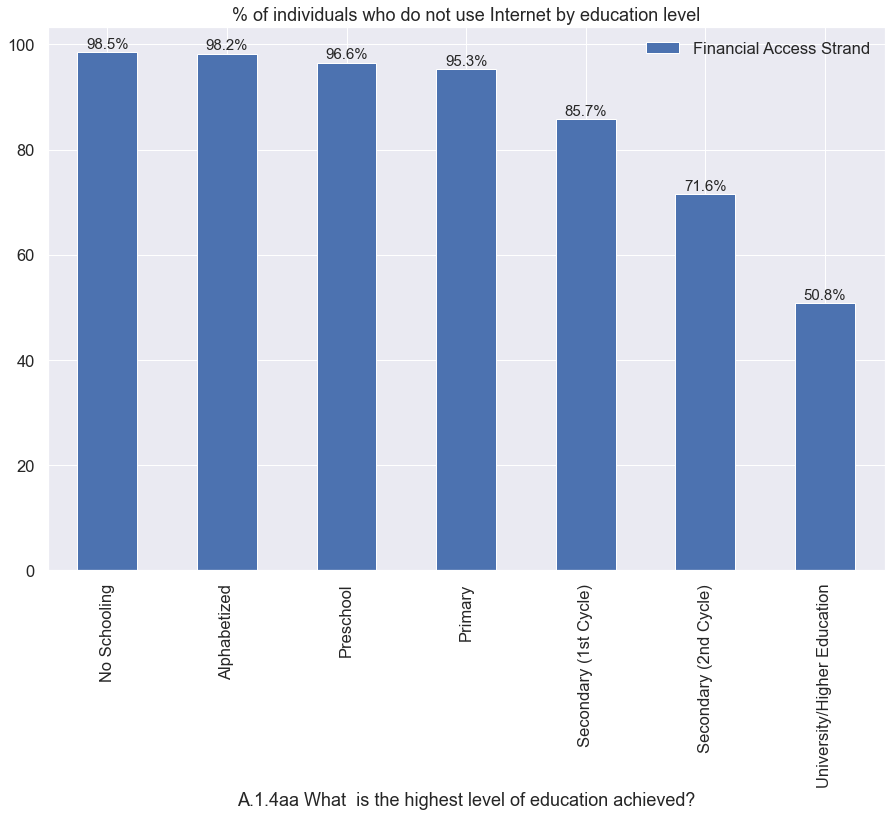

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Internet']==0].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).to_frame().plot.bar()

fig = plt.gcf()
fig.set_size_inches(15, 10) 
plt.title("% of individuals who do not use Internet by education level")
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')  

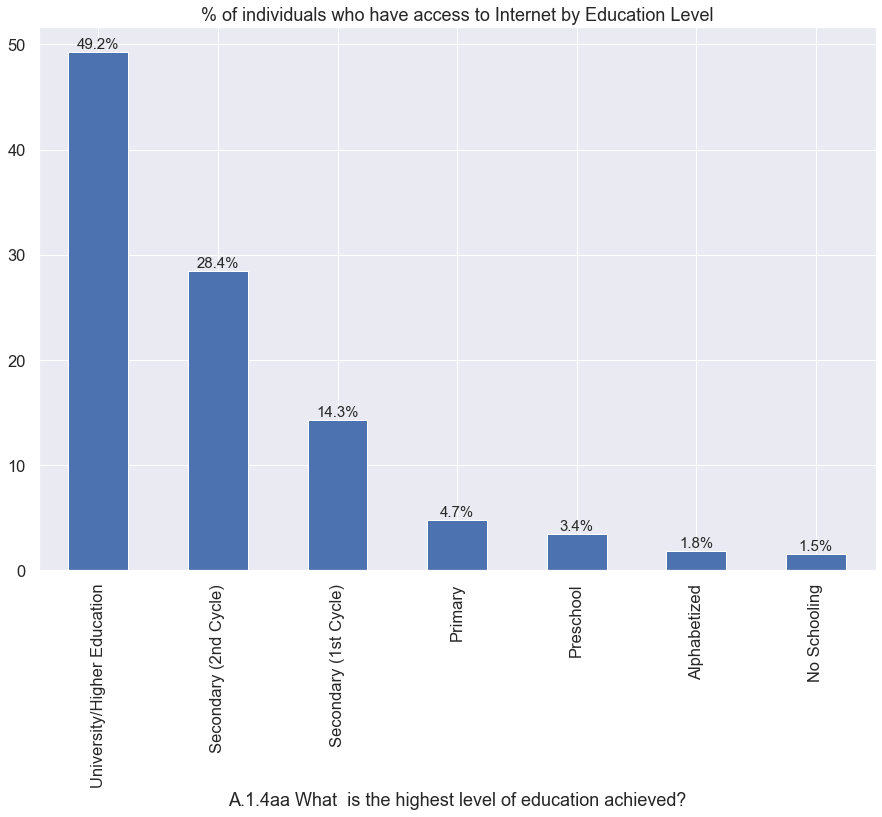

In [ ]:
ax = ((df1[df1['E2. Now I would like to obtain information on the communication devices or services you use or own.?: Internet']==1].groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count()*100)/(df1.groupby(['A.1.4aa What  is the highest level of education achieved?'])['Financial Access Strand'].count())).sort_values(ascending = False).rename(index = {1: 'No Schooling',
 2.0: 'Alphabetized',
 3.0: 'Preschool',
 4.0: 'Primary',
 5.0: 'Secondary (1st Cycle)',
 6.0: 'Secondary (2nd Cycle)',
 7.0: 'University/Higher Education'}).plot.bar()
plt.title('% of individuals who have access to Internet by Education Level')
fig = plt.gcf()
fig.set_size_inches(15, 10) 
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points') 

In [266]:
df1

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,...,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash,Mobile Money,Financial Access Strand,Saving,Borrowing,i2i_Source_of_income,age_bins
0,9.0,1.0,5.0,1.0,43.0,5.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.0,8
1,9.0,1.0,7.0,0.0,28.0,3.0,7.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,9.0,3
2,9.0,1.0,3.0,0.0,16.0,1.0,4.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,6.0,0
3,9.0,1.0,5.0,1.0,27.0,1.0,6.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0,3
4,1.0,1.0,2.0,0.0,26.0,1.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,11.0,0.0,6.0,0.0,34.0,2.0,4.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,5.0,5
4265,11.0,0.0,7.0,1.0,22.0,1.0,4.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1,2.0,0.0,0.0,2.0,1
4266,11.0,0.0,3.0,1.0,20.0,1.0,5.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1,2.0,0.0,1.0,6.0,1
4267,11.0,0.0,1.0,1.0,19.0,1.0,4.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1,2.0,0.0,0.0,1.0,1


In [268]:
#df1.to_csv('df_to_scaled1.csv')

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.
 

 

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?